<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sigmoid" data-toc-modified-id="Sigmoid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sigmoid</a></span><ul class="toc-item"><li><span><a href="#Plotting-a-simple-sigmoid" data-toc-modified-id="Plotting-a-simple-sigmoid-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plotting a simple sigmoid</a></span></li><li><span><a href="#Let's-add-some-Gaussian-Noise-to-each-datapoint" data-toc-modified-id="Let's-add-some-Gaussian-Noise-to-each-datapoint-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Let's add some Gaussian Noise to each datapoint</a></span></li><li><span><a href="#Fit-sigmoid-function-(4-variables)" data-toc-modified-id="Fit-sigmoid-function-(4-variables)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fit sigmoid function (4 variables)</a></span></li><li><span><a href="#Effect-of-variables" data-toc-modified-id="Effect-of-variables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Effect of variables</a></span><ul class="toc-item"><li><span><a href="#Changing-a" data-toc-modified-id="Changing-a-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Changing <em>a</em></a></span></li><li><span><a href="#Changing-b" data-toc-modified-id="Changing-b-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Changing <em>b</em></a></span></li><li><span><a href="#Changing-c" data-toc-modified-id="Changing-c-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Changing <em>c</em></a></span></li><li><span><a href="#Changing-d" data-toc-modified-id="Changing-d-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Changing <em>d</em></a></span></li></ul></li></ul></li><li><span><a href="#Decaying-Exponential-now" data-toc-modified-id="Decaying-Exponential-now-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decaying Exponential now</a></span><ul class="toc-item"><li><span><a href="#Plotting-a-simple-decaying-exponential" data-toc-modified-id="Plotting-a-simple-decaying-exponential-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting a simple decaying exponential</a></span></li><li><span><a href="#Add-Gaussian-Noise-to-datapoints" data-toc-modified-id="Add-Gaussian-Noise-to-datapoints-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Add Gaussian Noise to datapoints</a></span></li><li><span><a href="#Fit-exponential-function-(4-variables)" data-toc-modified-id="Fit-exponential-function-(4-variables)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fit exponential function (4 variables)</a></span></li><li><span><a href="#Effect-of-variables" data-toc-modified-id="Effect-of-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Effect of variables</a></span><ul class="toc-item"><li><span><a href="#Changing-a" data-toc-modified-id="Changing-a-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Changing <em>a</em></a></span></li><li><span><a href="#Changing-b" data-toc-modified-id="Changing-b-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Changing <em>b</em></a></span></li><li><span><a href="#Changing-c" data-toc-modified-id="Changing-c-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Changing <em>c</em></a></span></li><li><span><a href="#Changing-d" data-toc-modified-id="Changing-d-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Changing <em>d</em></a></span></li></ul></li></ul></li></ul></div>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)

# Sigmoid

## Plotting a simple sigmoid

In [41]:
x = np.linspace(-6,6,500)

In [87]:
def sigmoid(x):
    return 1/(1+np.exp(-2*(x)))

In [88]:
y = sigmoid(x)

In [89]:
zero = np.zeros(500)

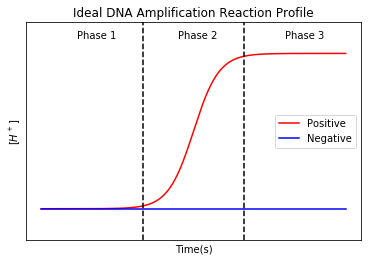

In [108]:
plt.plot(x,y, '-', markersize=1, color='red', label='Positive')
plt.plot(x,zero, '-', markersize=1, color='blue', label = 'Negative')
plt.legend(loc='center right')
plt.xlabel("Time(s)")
plt.ylabel("[$H^+$]")
plt.ylim([-0.2, 1.2])
plt.axvline(x=-2, linestyle = '--', color='k')
plt.axvline(x=2, linestyle = '--', color='k')
plt.text(-4.6, 1.1, "Phase 1")
plt.text(-0.6, 1.1, "Phase 2")
plt.text(3.6, 1.1, "Phase 3")
#plt.grid(b=True, which='both', axis='both',linewidth=1)
plt.xticks([],[])
plt.yticks([],[])
plt.title("Ideal DNA Amplification Reaction Profile")
plt.savefig("dna_amp.png")

## Let's add some Gaussian Noise to each datapoint

Mean 0, Std deviation parameterized

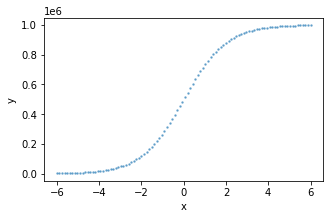

In [8]:
noise_std = 0.1
wgn = np.random.normal(0,noise_std,100)
noisy_data = y+wgn
plt.plot(x,noisy_data, '.', markersize=3, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fit sigmoid function (4 variables)

s(x) = a/(b+e^-cx) + d

In [9]:
def fit_sigmoid(x, a, b, c, d):
    return a/(b+np.exp(-c*x))+d

In [10]:
def plot_fitted_vs_data(popt):
    plt.plot(x, fit_sigmoid(x,*popt), label='fitted curve')
    plt.plot(x, noisy_data, '.', markersize=3, alpha=0.5, label='data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Fitted sigmoid")
    plt.show()

<ipython-input-9-ece4ec44930c>:2: RuntimeWarning: overflow encountered in exp
  return a/(b+np.exp(-c*x))+d
/Users/kunal/anaconda3/envs/curve_fitting/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


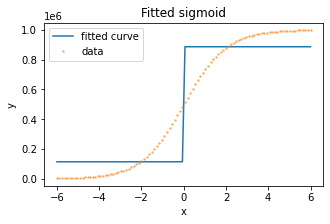

In [11]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_sigmoid, x, noisy_data)
plot_fitted_vs_data(popt)

## Effect of variables

In [230]:
print(popt)

[0.88378287 0.92754067 1.11355263 0.01486959]


_So the best approximation to a simple sigmoid, 1/(1+e^-x), plus gaussian noise, is a sigmoid curve with function 0.88/(0.93 + e^-1.11x) + 0.015. Wild_

In [231]:
#Parameterize optimal coefficients

a_original = popt[0]
b_original = popt[1]
c_original = popt[2]
d_original = popt[3]

In [232]:
def plot_var_change_effect(ax, popt, parameter_name, value):
    ax.plot(x, fit_sigmoid(x,*popt), label='fitted curve')
    ax.plot(x, noisy_data, '.', markersize=3, alpha=0.5, label='data')
    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    ax.set_title("{} = {}".format(parameter_name, value))

### Changing _a_

How does the fitted curve change as _a_ is halved, or doubled?

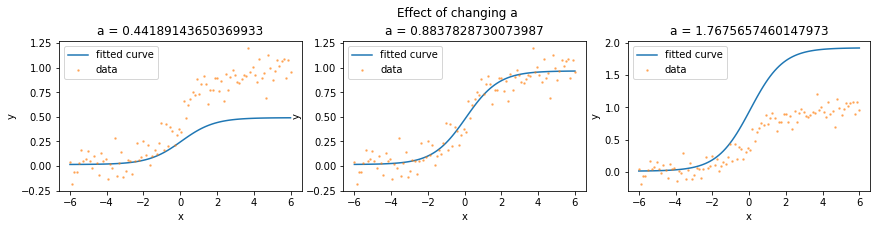

In [233]:
a_values = [a_original/2, a_original, a_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing a")
fig.tight_layout()

for index, a in enumerate(a_values):
    popt_new[0] = a
    plot_var_change_effect(axs[index], popt_new, "a", a)

plt.show()


**Clearly _a_ is for vertical scaling.**

### Changing _b_

Repeat procedure for b.

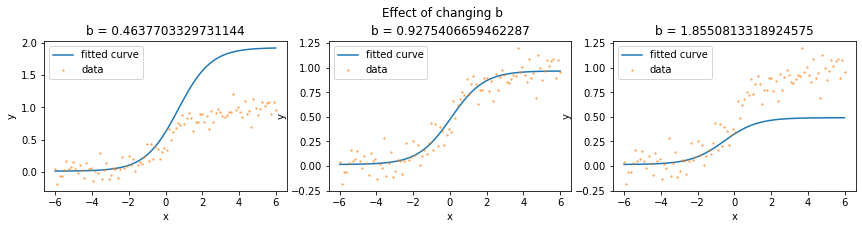

In [242]:
b_values = [b_original/2, b_original, b_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing b")
fig.tight_layout()

for index, b in enumerate(b_values):
    popt_new[1] = b
    plot_var_change_effect(axs[index], popt_new, "b", b)

plt.show()


**_b_ is for also vertical scaling, but in the opposite direction to _a_**

### Changing _c_

Repeat procedure for c.

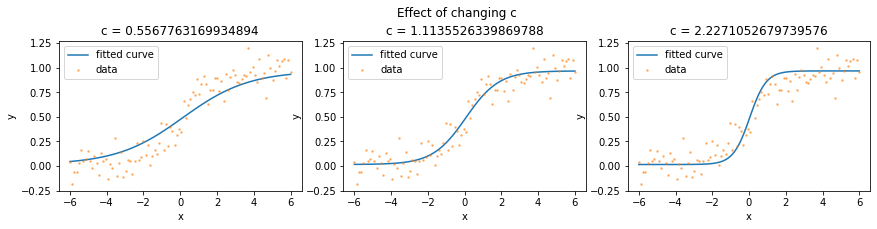

In [236]:
c_values = [c_original/2, c_original, c_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing c")
fig.tight_layout()

for index, c in enumerate(c_values):
    popt_new[2] = c
    plot_var_change_effect(axs[index], popt_new, "c", c)

plt.show()


**_c_ is for horizontal scaling, the curve gets more "stretched" as c reduces**

It doesn't increase as sharply, though it has the same range.

### Changing _d_

Repeat procedure for d.

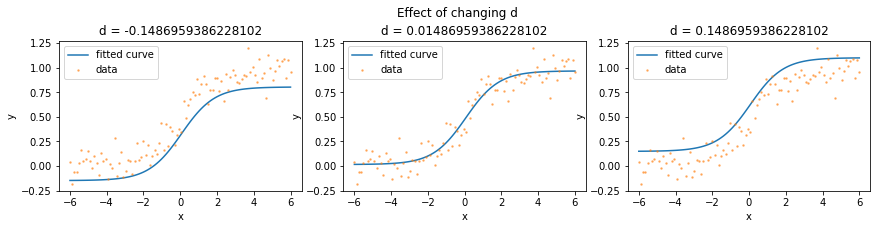

In [239]:
d_values = [-10*d_original, d_original, d_original*10]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing d")
fig.tight_layout()

for index, d in enumerate(d_values):
    popt_new[3] = d
    plot_var_change_effect(axs[index], popt_new, "d", d)

plt.show()


**The most obvious - _d_ controls the vertical offset.**

Since d is very small, I had to increase the amount of change for a more noticable difference.

# Decaying Exponential now
## Plotting a simple decaying exponential
Fun

In [252]:
x = np.linspace(0,6,100)

In [253]:
def decay_exp(x):
    return np.exp(-1*x)

In [254]:
y = decay_exp(x)

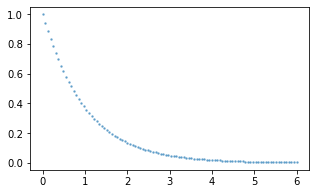

In [255]:
plt.plot(x,y, '.', markersize=3, alpha=0.5)

## Add Gaussian Noise to datapoints

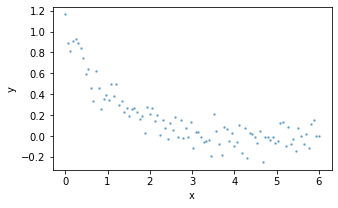

In [257]:
noise_std = 0.1
wgn = np.random.normal(0,noise_std,100)
noisy_data = y+wgn
plt.plot(x,noisy_data, '.', markersize=3, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Fit exponential function (4 variables)

In [258]:
def fit_exp(x, a, b, c, d):
    return a*np.exp((-b*x) + c) + d

In [259]:
def plot_fitted_vs_data(popt):
    plt.plot(x, fit_exp(x,*popt), label='fitted curve')
    plt.plot(x, noisy_data, '.', markersize=3, alpha=0.5, label='data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Fitted exponential")
    plt.show()

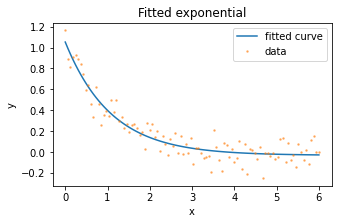

In [260]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_exp, x, noisy_data)
plot_fitted_vs_data(popt)

## Effect of variables

In [262]:
print(popt)

[ 0.717728    0.92361691  0.41305661 -0.03186814]


As before. e^-x + noise is best approximated by: 0.718e^(0.41-0.92x) - 0.032

In [263]:
#Parameterize optimal coefficients

a_original = popt[0]
b_original = popt[1]
c_original = popt[2]
d_original = popt[3]

In [264]:
def plot_var_change_effect(ax, popt, parameter_name, value):
    ax.plot(x, fit_exp(x,*popt), label='fitted curve')
    ax.plot(x, noisy_data, '.', markersize=3, alpha=0.5, label='data')
    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    ax.set_title("{} = {}".format(parameter_name, value))

### Changing _a_

How does the fitted curve change as _a_ is halved, or doubled?

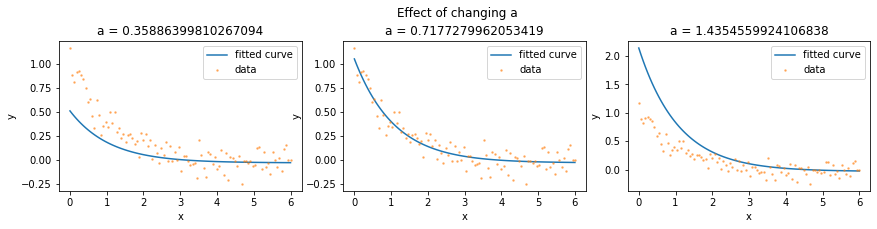

In [265]:
a_values = [a_original/2, a_original, a_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing a")
fig.tight_layout()

for index, a in enumerate(a_values):
    popt_new[0] = a
    plot_var_change_effect(axs[index], popt_new, "a", a)

plt.show()


**Clearly _a_ is for vertical scaling.**

### Changing _b_

Repeat procedure for b.

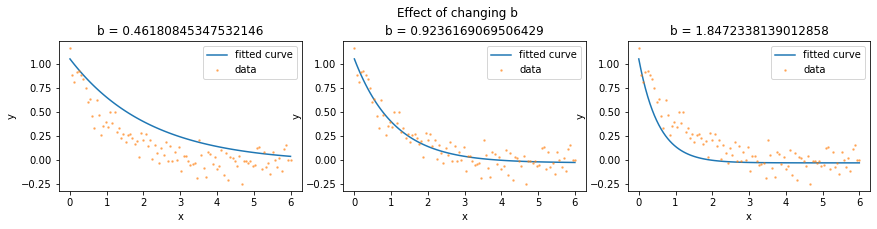

In [266]:
b_values = [b_original/2, b_original, b_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing b")
fig.tight_layout()

for index, b in enumerate(b_values):
    popt_new[1] = b
    plot_var_change_effect(axs[index], popt_new, "b", b)

plt.show()


**_b_ is for horizontal scaling, it seems to control the "stretch" of the exponential curve**

### Changing _c_

Repeat procedure for c.

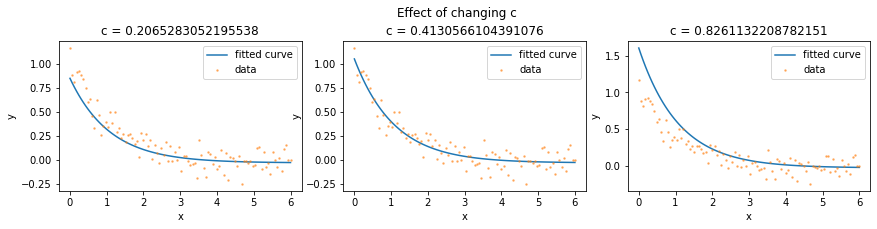

In [267]:
c_values = [c_original/2, c_original, c_original*2]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing c")
fig.tight_layout()

for index, c in enumerate(c_values):
    popt_new[2] = c
    plot_var_change_effect(axs[index], popt_new, "c", c)

plt.show()


**_c_ controls the extent of gradient change of the exponential curve**

The smaller c is, the smaller the magnitude of the initial gradient of the exponential.

### Changing _d_

Repeat procedure for d.

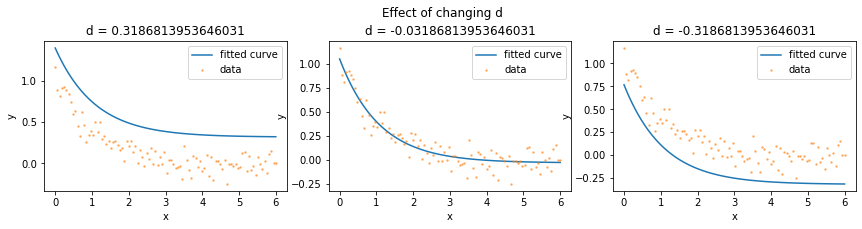

In [268]:
d_values = [-10*d_original, d_original, d_original*10]
popt_new = popt.copy()

fig,axs = plt.subplots(1,3,figsize=(12,3))
fig.suptitle("Effect of changing d")
fig.tight_layout()

for index, d in enumerate(d_values):
    popt_new[3] = d
    plot_var_change_effect(axs[index], popt_new, "d", d)

plt.show()


**The most obvious: _d_ controls the vertical offset. Note the original d here is negative.**

Since d is very small, I had to increase the amount of change for a more noticable difference.

1. define function which takes in x and y and outputs sigmoid parameters (and plot maybe) but i want it to work when u had a problem like i just showed you (sigmoid times 1 million) OR if i multiply the x coordingates by a million as well --- test robustness to stuff like this
2. what's curve_fit doing? what algoerithm does it use, what other optinos are there. understand curve_fit